In [3]:
import wave

obj=wave.open('C:\AD055\DL\RagaDetection\Aaj ayodhya sakjlii.wav','rb')
print("Number of Channels",obj.getnchannels())
print("Sample width: ",obj.getsampwidth())
print("Frame rate",obj.getframerate())
print("Parameters: ",obj.getparams())

Number of Channels 1
Sample width:  2
Frame rate 44100
Parameters:  _wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=10330112, comptype='NONE', compname='not compressed')


In [7]:
import math
from scipy.io import wavfile
import numpy as np

sampleRate, data=wavfile.read('C:\AD055\DL\RagaDetection\Aaj ayodhya sakjlii.wav')
samples=data.shape[0]

keyChange=2
newrate=0
newData=np.array([])

factor=1/((1.06**keyChange)-1)

if keyChange>0:
    for i in range(samples):
        if i% factor == 0:
            np.insert(data,i,data[i])
        newData=data
        newRate=math.floor(sampleRate*(1.06**keyChange))    
else:
    newData=[]
    for i in range(samples):
        if not i%factor ==0:
            newData.append(data[i])
    newRate=math.floor(sampleRate/(1.06**keyChange))       
    newData = np.array(newData) 


newData = newData.astype(np.int16)

# Write the new .wav file
output_file = 'output.wav'
wavfile.write(output_file, newRate, newData)

print(f"Output written to {output_file}")

Output written to output.wav


In [5]:
import os
from scipy.io import wavfile

def newScale(currentScale, keyChange):
    scales=['E','F','F#','G','G#','A','A#', 'B', 'C', 'C#','D','D#']
    currentScaleIndex=scales.index(currentScale.upper())
    newScale=scales[keyChange+currentScaleIndex]
    return newScale

def pitchChanger(sampleRate, data,currentScale, keyChange,newName):
    samples=data.shape[0]

    newrate=0
    newData=np.array([])
    factor=1/((1.06**keyChange)-1)
    if keyChange>0:
        for i in range(samples):
            if i% factor == 0:
                np.insert(data,i,data[i])
            newData=data
            newRate=math.floor(sampleRate*(1.06**keyChange))    
    else:
        newData=[]
        for i in range(samples):
            if not i%factor ==0:
                newData.append(data[i])
        newRate=math.floor(sampleRate/(1.06**keyChange))       
        newData = np.array(newData) 
    
    output_folder='C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\D\Dtoother'
    newData = newData.astype(np.int16)
    pitch=newScale(currentScale, keyChange)
    # Write the new .wav file
    output_file = os.path.join(output_folder,f'{newName} {pitch}.wav')
    wavfile.write(output_file, newRate, newData)
    

In [6]:
import os
import re
import math
from scipy.io import wavfile
import numpy as np
# Path to the folder containing .wav files
folder_path = "C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\D\Dwav"
output_path='C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\D\Dtoother'
# Iterate through all files in the folder
os.makedirs(output_path, exist_ok=True)

for filename in os.listdir(folder_path):
    print(filename)
    full_path = os.path.join(folder_path, filename)
#     if filename.endswith(".wav"):
#         # Match the desired parts of the filename using regex
    match = re.match(r".*__(.*?)__.*-by-(.*?)-in-(.*?)-raaga\.wav", filename)
    if match:
        #print(match.group(1), match.group(2))
        artist = match.group(2)
        raga = match.group(3)
        # Create the new filename
        new_filename = f"{artist}-{raga}"
        print(new_filename)
        sampleRate, data=wavfile.read(full_path)
        pitchChanger(sampleRate, data, 'D',-1,new_filename)
    else: continue    
           

223579__gopalkoduri__carnatic-varnam-by-prasanna-in-abhogi-raaga.wav
prasanna-abhogi


C:\Users\msacc\AppData\Local\Temp\ipykernel_11272\806054110.py:25: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampleRate, data=wavfile.read(full_path)


223580__gopalkoduri__carnatic-varnam-by-ramakrishnamurthy-in-abhogi-raaga.wav
ramakrishnamurthy-abhogi
223583__gopalkoduri__carnatic-varnam-by-prasanna-in-begada-raaga.wav
prasanna-begada
223587__gopalkoduri__carnatic-varnam-by-prasanna-in-kalyani-raaga.wav
prasanna-kalyani
223588__gopalkoduri__carnatic-varnam-by-ramakrishnamurthy-in-kalyani-raaga.wav
ramakrishnamurthy-kalyani
223592__gopalkoduri__carnatic-varnam-by-prasanna-in-mohanam-raaga.wav
prasanna-mohanam
223593__gopalkoduri__carnatic-varnam-by-ramakrishnamurthy-in-mohanam-raaga.wav
ramakrishnamurthy-mohanam
223595__gopalkoduri__carnatic-varnam-by-ramakrishnamurthy-in-sahana-raaga.wav
ramakrishnamurthy-sahana
223600__gopalkoduri__carnatic-varnam-by-prasanna-in-saveri-raaga.wav
prasanna-saveri
223601__gopalkoduri__carnatic-varnam-by-ramakrishnamurthy-in-saveri-raaga.wav
ramakrishnamurthy-saveri
223604__gopalkoduri__carnatic-varnam-by-ramakrishnamurthy-in-sri-raaga.wav
ramakrishnamurthy-sri


In [6]:
import os
from scipy.io import wavfile

folder_path = r'C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav'  # Replace with your folder path

for filename in os.listdir(folder_path):
    full_path = os.path.join(folder_path, filename)  # Construct full file path
    print(full_path)
    sampleRate, data = wavfile.read(full_path)  # Use the full path
    print("Sample Rate:", sampleRate)
    print("Data Shape:", data.shape)


C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav\223578__gopalkoduri__carnatic-varnam-by-dharini-in-abhogi-raaga.wav
Sample Rate: 22050
Data Shape: (8168256,)
C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav\223581__gopalkoduri__carnatic-varnam-by-sreevidya-in-abhogi-raaga.wav
Sample Rate: 22050
Data Shape: (6346368, 2)
C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav\223584__gopalkoduri__carnatic-varnam-by-sreevidya-in-begada-raaga.wav
Sample Rate: 22050
Data Shape: (9239616, 2)
C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav\223591__gopalkoduri__carnatic-varnam-by-dharini-in-mohanam-raaga.wav
Sample Rate: 22050
Data Shape: (8737920,)
C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav\223594__gopalkoduri__carnatic-varnam-by-dharini-in-sahana-raaga.wav
Sample Rate: 22050
Data Shape: (10200384,)
C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\A\Awav\223596__gopalkoduri__carnatic-varnam-by-sreevidya-in-sahana-raaga.wav
Sample Rate: 220

C:\Users\msacc\AppData\Local\Temp\ipykernel_6880\903083965.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampleRate, data = wavfile.read(full_path)  # Use the full path


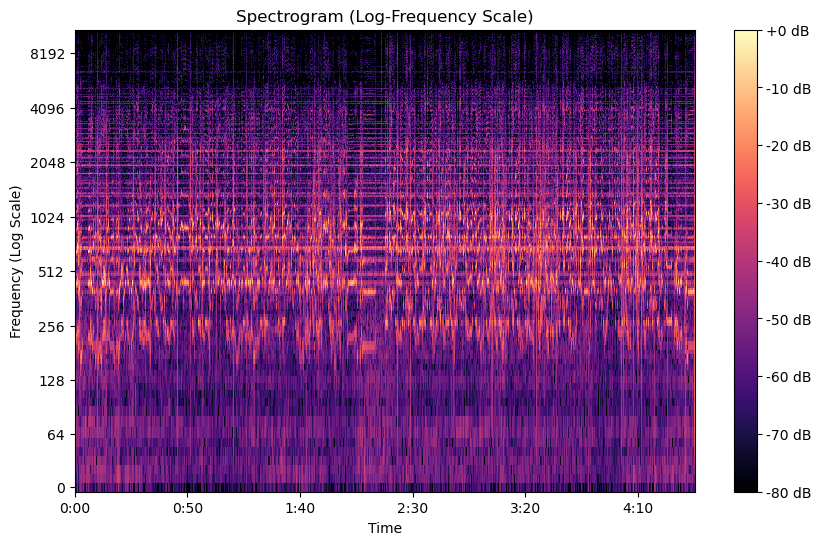

Normalized audio saved as 'normalized_audio.wav'.


In [7]:
#preprocessing: normalise, sampling, fourier transform
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Function to process audio
def process_audio_to_spectrogram(input_wav, output_sample_rate=22050):
    # Step 1: Load the audio file and resample it
    y, sr = librosa.load(input_wav, sr=output_sample_rate)  # sr: target sampling rate

    # Step 2: Normalize the audio waveform
    y = librosa.util.normalize(y)

    # Step 3: Perform Short-Time Fourier Transform (STFT) for spectrogram
    D = np.abs(librosa.stft(y))  # Magnitude of STFT

    # Step 4: Convert to dB scale (logarithmic) for better visualization
    spectrogram = librosa.amplitude_to_db(D, ref=np.max)

    # Step 5: Plot and save the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectrogram, sr=output_sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram (Log-Frequency Scale)")
    plt.xlabel("Time")
    plt.ylabel("Frequency (Log Scale)")
    plt.show()

    # Optional: Save normalized audio if needed
    sf.write("normalized_audio.wav", y, output_sample_rate)
    print("Normalized audio saved as 'normalized_audio.wav'.")

# Input: Path to your wav file
input_wav = "C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\D\Dtoother\prasanna-abhogi A.wav"  # Replace with your input wav file path
process_audio_to_spectrogram(input_wav, output_sample_rate=22050)


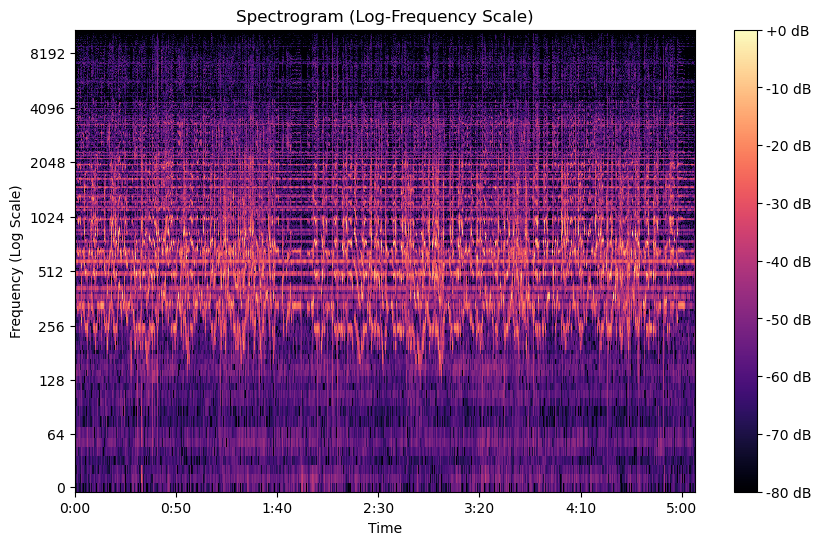

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

# Function to process audio
def process_audio_to_spectrogram(input_wav, output_sample_rate=22050):
    # Step 1: Load the audio file and resample it
    y, sr = librosa.load(input_wav, sr=output_sample_rate)  # sr: target sampling rate

    # Step 2: Normalize the audio waveform
    y = librosa.util.normalize(y)

    # Step 3: Perform Short-Time Fourier Transform (STFT) for spectrogram
    D = np.abs(librosa.stft(y))  # Magnitude of STFT

    # Step 4: Convert to dB scale (logarithmic) for better visualization
    spectrogram = librosa.amplitude_to_db(D, ref=np.max)

    # Step 5: Plot and save the spectrogram
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(spectrogram, sr=output_sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram (Log-Frequency Scale)")
    plt.xlabel("Time")
    plt.ylabel("Frequency (Log Scale)")
    plt.show()

    # Optional: Save normalized audio if needed
    # sf.write("normalized_audio.wav", y, output_sample_rate)
    # print("Normalized audio saved as 'normalized_audio.wav'.")

# Input: Path to your wav file
input_wav = "C:\AD055\DL\RagaDetection\carnatic_varnam_1.1\Audio\D\Dtoother\prasanna-kalyani C.wav"  # Replace with your input wav file path
process_audio_to_spectrogram(input_wav, output_sample_rate=22050)

